In [1]:
# Import dependencies. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and lognitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and lognitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the list of cities.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e5efb6fe89b37682abebc20c98bd6c3


In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | jishou
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | gewane
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | el alto
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | karratha
Processing Record 13 of Set 1 | inhambane
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | stillwater
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | srednekolymsk
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Reco

Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | asfi
Processing Record 45 of Set 4 | lamar
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | klyuchi
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | sorland
Processing Record 50 of Set 4 | sakaiminato
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | djibo
Processing Record 3 of Set 5 | ambunti
Processing Record 4 of Set 5 | hutchinson
Processing Record 5 of Set 5 | hervey bay
Processing Record 6 of Set 5 | dharchula
Processing Record 7 of Set 5 | ranong
Processing Record 8 of Set 5 | nichlaul
Processing Record 9 of Set 5 | sao raimundo nonato
Processing Record 10 of Set 5 | boa vista
Processing Record 11 of Set 5 | tapaua
City not found. Skipping...
Processing Record 12 of Set 5 | rawson
Processing Record 13 of Set 5 | poum
Processing Record 14 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Reco

Processing Record 30 of Set 8 | preobrazheniye
Processing Record 31 of Set 8 | teyateyaneng
Processing Record 32 of Set 8 | terrace
Processing Record 33 of Set 8 | abha
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | satitoa
City not found. Skipping...
Processing Record 36 of Set 8 | namatanai
Processing Record 37 of Set 8 | labuhan
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | maine-soroa
Processing Record 40 of Set 8 | valparaiso
Processing Record 41 of Set 8 | sao gotardo
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | kirkland lake
Processing Record 44 of Set 8 | luena
Processing Record 45 of Set 8 | omboue
Processing Record 46 of Set 8 | quatre cocos
Processing Record 47 of Set 8 | port hawkesbury
Processing Record 48 of Set 8 | saleaula
City not found. Skipping...
Processing Record 49 of Set 8 | chivay
Processing Record 50 of Set 8 | erbaa
Processing Record 1 of Set 9 | laguna
Processing Record 2 of Set 9 |

Processing Record 20 of Set 12 | devils lake
Processing Record 21 of Set 12 | balimo
City not found. Skipping...
Processing Record 22 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 23 of Set 12 | luan
Processing Record 24 of Set 12 | isangel
Processing Record 25 of Set 12 | pyaozerskiy
Processing Record 26 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 27 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 28 of Set 12 | chepen
Processing Record 29 of Set 12 | san patricio
Processing Record 30 of Set 12 | muyezerskiy
Processing Record 31 of Set 12 | marathon
Processing Record 32 of Set 12 | occhiobello
Processing Record 33 of Set 12 | nicoya
Processing Record 34 of Set 12 | alamogordo
Processing Record 35 of Set 12 | mangaldai
Processing Record 36 of Set 12 | ayan
Processing Record 37 of Set 12 | nacala
Processing Record 38 of Set 12 | vila franca do campo
Processing Record 39 of Set 12 | muravlenko
Processing Record 40 of Set 12 | maumer

In [9]:
# Get how many cities are in our array of dictionaries
len(city_data)

574

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.89,-156.47,78.80,65,20,18.34,US,2020-12-22 04:18:20
1,Hobart,-42.88,147.33,64.99,88,75,6.93,AU,2020-12-22 04:14:42
2,Barrow,71.29,-156.79,-27.40,74,1,8.05,US,2020-12-22 04:18:21
3,Jishou,28.32,109.72,54.00,44,0,1.14,CN,2020-12-22 04:18:21
4,Hithadhoo,-0.60,73.08,81.68,75,100,15.05,MV,2020-12-22 04:18:21
5,Gewane,10.17,40.65,70.93,60,18,3.85,ET,2020-12-22 04:18:22
6,Ushuaia,-54.80,-68.30,46.40,74,20,13.87,AR,2020-12-22 04:17:38
7,El Alto,-4.27,-81.21,66.90,86,99,13.49,PE,2020-12-22 04:18:22
8,Hermanus,-34.42,19.23,70.00,82,72,8.99,ZA,2020-12-22 04:18:22
9,Saint-Philippe,-21.36,55.77,80.60,69,0,2.24,RE,2020-12-22 04:18:23


In [11]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2020-12-22 04:18:20,20.89,-156.47,78.80,65,20,18.34
1,Hobart,AU,2020-12-22 04:14:42,-42.88,147.33,64.99,88,75,6.93
2,Barrow,US,2020-12-22 04:18:21,71.29,-156.79,-27.40,74,1,8.05
3,Jishou,CN,2020-12-22 04:18:21,28.32,109.72,54.00,44,0,1.14
4,Hithadhoo,MV,2020-12-22 04:18:21,-0.60,73.08,81.68,75,100,15.05
5,Gewane,ET,2020-12-22 04:18:22,10.17,40.65,70.93,60,18,3.85
6,Ushuaia,AR,2020-12-22 04:17:38,-54.80,-68.30,46.40,74,20,13.87
7,El Alto,PE,2020-12-22 04:18:22,-4.27,-81.21,66.90,86,99,13.49
8,Hermanus,ZA,2020-12-22 04:18:22,-34.42,19.23,70.00,82,72,8.99
9,Saint-Philippe,RE,2020-12-22 04:18:23,-21.36,55.77,80.60,69,0,2.24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

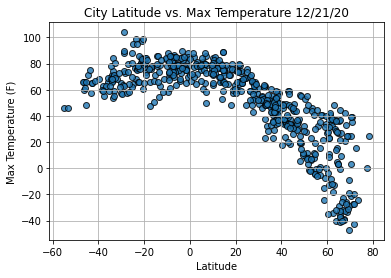

In [15]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

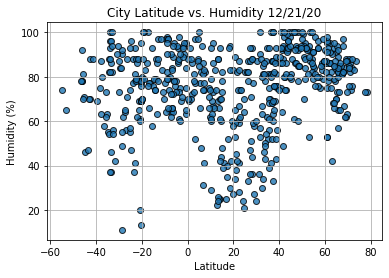

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

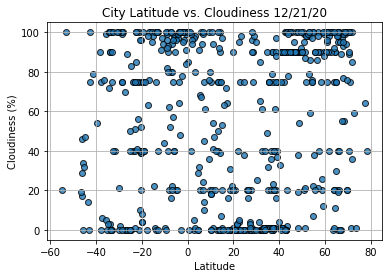

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

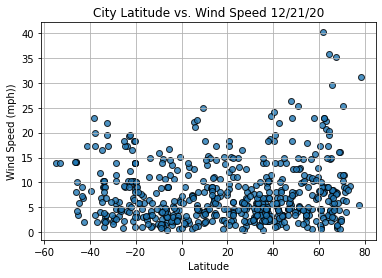

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()